# Numerical Methods Labs - Integration

We will introduce Python for Numerical Methods by looking at the numerical integration of a function - a central topic that we'll spend more time on later. In particular we'll look at the integrals

$$
\begin{aligned}
  I_1 &= \int_0^1 \text{d}x \, x^2 = \tfrac{1}{3}, \\ I_2 &= \int_0^1 \text{d}x \, \sqrt{1 - x^2} = \tfrac{\pi}{4}.
\end{aligned}
$$

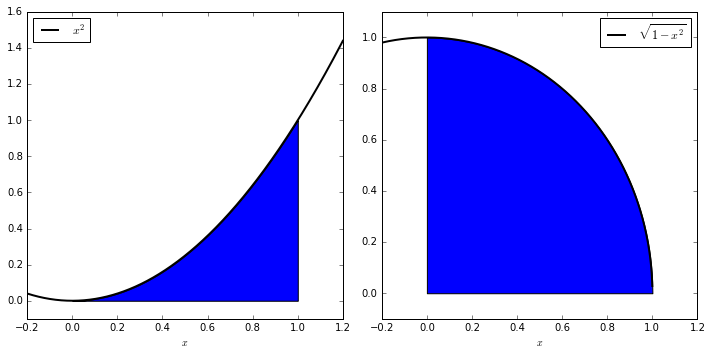

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

x = numpy.linspace(-0.2, 1.2, 1000)
x_integral = numpy.linspace(0.0, 1.0, 1000)

fig = pyplot.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.fill_between(x_integral, x_integral**2)
ax1.plot(x, x**2, 'k-', lw=2, label=r"$x^2$")
ax1.set_xlabel(r"$x$")
ax1.set_ylim(-0.1, 1.6)
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(122)
ax2.fill_between(x_integral, numpy.sqrt(1.0-x_integral**2))
ax2.plot(x[x<=1.0], numpy.sqrt(1.0-x[x<=1.0]**2), 'k-', lw=2, label=r"$\sqrt{1-x^2}$")
ax2.set_xlabel(r"$x$")
ax2.set_xlim(-0.2, 1.2)
ax2.set_ylim(-0.1, 1.1)
ax2.legend()

fig.tight_layout()
pyplot.show()

## Spyder

We are going to use Spyder to write and run Python code. There are many other ways of doing so: if you have a different preference, then use it.

Open Spyder (using Python version **3**): it should look roughly like the figure.

![The spyder editor, with the key areas outlined and coloured.](figs/spyder-py3-reduced.png)

We will start by using the console in the bottom right.

## Simple numerical integration

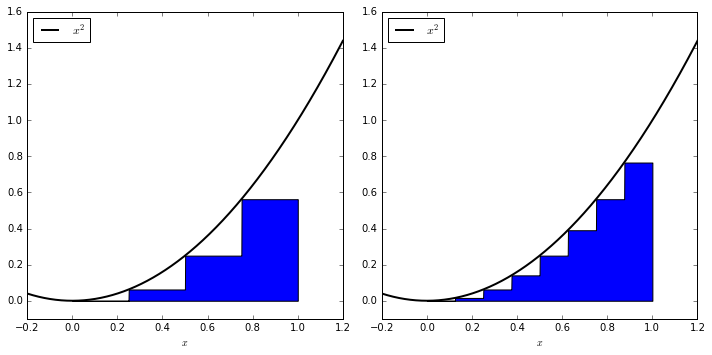

In [2]:
def stripes(f, x, Nstripes):
    """
    Show the stripes
    """
    boundaries = numpy.linspace(0.0, 1.0, Nstripes+1)
    integrand = numpy.zeros_like(x)
    for i in range(1, Nstripes):
        integrand += numpy.piecewise(x, 
                                     [x<boundaries[i], x>=boundaries[i]], 
                                     [0.0, f(boundaries[i]) - f(boundaries[i-1])])
    return integrand

f = lambda x : x**2

x = numpy.linspace(-0.2, 1.2, 1000)
x_integral = numpy.linspace(0.0, 1.0, 1000)

fig = pyplot.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.fill_between(x_integral, stripes(f, x_integral, 4))
ax1.plot(x, x**2, 'k-', lw=2, label=r"$x^2$")
ax1.set_xlabel(r"$x$")
ax1.set_ylim(-0.1, 1.6)
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(122)
ax2.fill_between(x_integral, stripes(f, x_integral, 8))
ax2.plot(x, x**2, 'k-', lw=2, label=r"$x^2$")
ax2.set_xlabel(r"$x$")
ax2.set_ylim(-0.1, 1.6)
ax2.legend(loc='upper left')

fig.tight_layout()
pyplot.show()

The region which we're integrating is split into $N$ strips - in the figure there are $4$ strips on the left and $8$ on the right. To height of each strip is the value of the function, $x^2$, at the left edge of the strip. The area of the strip is the height times the width, where the width is $1$ divided by the number of strips. The total area is the sum of the areas of all the strips. This total approximates the integral we want, $I_1$, which should be $1/3$.

Let's try this in the console for two strips.

In [3]:
(0**2 + (1/2)**2) * 1/2

0.21875

The height of each strip is given by the value at the left edge: $0, \tfrac{1}{2}$ are the location $x$ of the left edge, and the function is $x^2$. The width of each strip is $1/2$. 

We see the result isn't very accurate, so let's try with four strips.

In [4]:
(0**2 + (1/4)**2 + (2/4)**2 + (3/4)**2) * 1/4

0.2734375

We see that the result was more accurate (although still not good), but we had to do a lot of typing. Also, it's starting to get confusing as to what all the terms mean. Let's introduce some *variables* to keep things clearer.

##### Note

If the results that you got don't match these, especially if the results that you got were exactly zero, check that you're using Python version **3**, not version **2**. There are very few differences that will affect us, but a crucial one is to do with dividing integers. In Python **2** the integer division `1/4` returns an integer, rounded down - in this case `0`. In Python **3** it returns a real number.

## Variables

What are the points and what are the function values? What is the width of the strip? These are meaningful quantities we reason about, and we want our code to reflect that. Rather than working with raw numbers, we want to give things names.

Let's go back to the case with four strips. In the console, type

In [5]:
Nstrips = 4
width = 1 / Nstrips
integral_4 = (0**2 + (1/Nstrips)**2 + (2/Nstrips)**2 + (3/Nstrips)**2) * width

It's now clearer what the terms are in the sum. However, it hasn't produced any output to the screen. In order to produce output, either type the name of the variable:

In [6]:
integral_4

0.21875

or alternatively (and more usefully) use the `print` function:

In [7]:
print(integral_4)

0.21875


This can be used to explain the output more clearly:

In [8]:
print("The result using", Nstrips, "strips is", integral_4)

The result using 4 strips is 0.21875


Try doing the same with eight strips, storing the result in the variable `integral_8`. You should experiment with using the cursor keys (particularly the up arrow) to recover previously typed commands to save time, and the TAB key to auto-complete variable names: for example, type `inte` and then the TAB key.

##### Note

There are some restrictions on the *name* of a variable, and some conventions you should follow. To keep it simple:

* Always start with a letter
* Only use letters, numbers, or underscores
* Always use lower case
* Never use spaces
* Make the variable name meaningful

## Loops

Introducing variable names made things clearer, but there's still plenty of typing and places where things can go wrong. As we're doing the same thing over and over again, we should make the computer do it. We can do that with a *loop*.

Type the following in to the console to reproduce the four strip case:

In [9]:
Nstrips = 4
width = 1 / Nstrips
integral_4 = 0
points = 0, 1, 2, 3
for point in points:
    print("At point", point)
    height = (point / Nstrips)**2
    integral_4 = integral_4 + width * height
print("Final result is", integral_4)

At point 0
At point 1
At point 2
At point 3
Final result is 0.21875


Let's look at the key steps here. We have a number of points that we want to iterate over: `points = 0, 1, 2, 3`. The loop is defined by the `for` statement. It takes each member of the set `points` and sets the variable `point` to have that value, as shown by the values printed to the screen. It then executes the code statements that are indented for each member of the set, in this case adding up all the areas of the strips.

To define a loop, you must use the syntax `for thing in set:`, with the colon at the end of the line. The statements executed for each member of the set are those that are indented: use the TAB key for this. To have additional statements after the loop, stop indenting (or un-indent) the code, either use the delete key, or using Shift-TAB.

The things that you iterate over don't need to be integers. The following loop does the same job:

In [10]:
integral_4 = 0
locations = 0.0, 0.25, 0.5, 0.75
for location in locations:
    print("At location", location)
    height = location**2
    integral_4 = integral_4 + width * height
print("Final result is", integral_4)

At location 0.0
At location 0.25
At location 0.5
At location 0.75
Final result is 0.21875


Try this for the eight strip case.

It's still annoying as you have to type out all the points, or locations. Instead, we should get the computer to generate them. There's a standard function to do this: `range`.

In [11]:
Nstrips = 4
width = 1 / Nstrips
integral_4 = 0
for point in range(Nstrips):
    print("At point", point)
    height = (point / Nstrips)**2
    integral_4 = integral_4 + width * height
print("Final result is", integral_4)

At point 0
At point 1
At point 2
At point 3
Final result is 0.21875


When used in a loop like this, `range(Nstrips)` generates every integer from `0` up to `Nstrips-1`. Note that it does **not** include the last value `Nstrips`.

We can now easily do the eight strip case, or indeed the $64$ strip case:

In [12]:
Nstrips = 8
width = 1 / Nstrips
integral_8 = 0
for point in range(Nstrips):
    height = (point / Nstrips)**2
    integral_8 = integral_8 + width * height
print("Final result for", Nstrips, "strips is", integral_8)

Nstrips = 64
width = 1 / Nstrips
integral_64 = 0
for point in range(Nstrips):
    height = (point / Nstrips)**2
    integral_64 = integral_64 + width * height
print("Final result for", Nstrips, "strips is", integral_64)

Final result for 8 strips is 0.2734375
Final result for 64 strips is 0.3255615234375


We can see that it's getting closer to the correct answer of $1/3$. But we're still repeating a lot of code, and there's many chances for things to go wrong. Let's create our own function to stop that.

## Functions

We can now see a general pattern for integrating the function $x^2$. We want to be able to do this for any number of strips with a single command. We do this by defining our own function:

In [13]:
def integral_1(Nstrips):
    """
    The first integral: integrate x**2 between 0 and 1.
    """
    
    width = 1/Nstrips
    integral = 0
    for point in range(Nstrips):
        height = (point / Nstrips)**2
        integral = integral + width * height
    
    return integral

First, let's check that this reproduces the results we had before:

In [14]:
print(integral_1(4))
print(integral_1(8))
print(integral_1(64))

0.21875
0.2734375
0.3255615234375


Now, let's examine what we've done. We have *defined* the function `integral_1` using the line `def integral_1(Nstrips):`. The `def` keyword says that what follows will be a function. The next thing, up until the brackets, is the name of the function, in this case `integral_1`. This should obey the same rules as variable names. The names in the brackets are the names of the input variables. These are the names that will be used internal to the function. If there are no inputs, you still need the brackets (eg, `integral_1()`). If there is more than one input, you separate them by commas.

The line defining the function name must end with a colon. This is just like a `for` loop. What follows is also just like a `for` loop: the function is defined by the statements that are indented (using TAB) relative to the line defining the function.

Immediately after the line defining the function there is a string describing what the function does. You can print this string using:

In [15]:
help(integral_1)

Help on function integral_1 in module __main__:

integral_1(Nstrips)
    The first integral: integrate x**2 between 0 and 1.



Spyder will also display this help in the Object Inspector in the top right: type the name in the box and see what you get. Documenting your functions sensibly is a crucial part of programming.

Next we have the actual code. This is exactly the loop used to define the integral approximation, with the result assigned to the variable called `integral`. The final line is the only new thing. Once the calculation and the function has done its work, it has to say what information that it has calculated should be "sent back" to the caller. This is done using the `return` statement: all variables after the `return` will be output from the function. If you want to send back multiple variables, separate them with commas again.

We can now call the function for (much) larger numbers of strips and see how close we get to the correct answer of $1/3$:

In [16]:
print("One hundred strips:", integral_1(100))
print("One thousand strips:", integral_1(1000))
print("One million strips:", integral_1(1000000))

One hundred strips: 0.32835000000000014
One thousand strips: 0.3328335000000003
One million strips: 0.3333328333334962


## Scripts

By now you've done a lot of work in the console. If you close Spyder, or it crashes, all that work will be lost. It's time to start using scripts to keep control of your work and so you can re-use it.

First, in the console type `%hist`. This will show all the commands that you have typed so far. You can copy and paste them into a file in the editor.

Next, go to the editor. Open a new file (either from the file menu or the tool bar, just as you would in a word processor). Copy and paste the parts of your code that you want to save. At a minimum your file should contain:

```python
(0**2 + (1/4)**2 + (2/4)**2 + (3/4)**2) * 1/4

Nstrips = 4
width = 1/Nstrips
integral_4 = 0
for point in range(Nstrips):
    print("At point", point)
    height = (point / Nstrips)**2
    integral_4 = integral_4 + width * height
print("Final result is", integral_4)

def integral_1(Nstrips):
    """
    The first integral: integrate x**2 between 0 and 1.
    """
    
    width = 1/Nstrips
    integral = 0
    for point in range(Nstrips):
        height = (point / Nstrips)**2
        integral = integral + width * height
    
    return integral

print("One hundred strips:", integral_1(100))
```

Save the resulting file in a sensible location (the Desktop, or somewhere on your filespace) under the name `lab1_integral_1.py`. Again, filenames should follow the same conventions as variable and function names (no spaces, lower case, etc), with a `.py` file extension.

Now run the file (press the green "play" button on the toolbar, or from the Run menu). You should see the output in the console. *However*, you should note that the line `(0**2 + (1/4)**2 + (2/4)**2 + (3/4)**2) * 1/4` produced no output. Statements contained in files like this do not produce output: you have to explicitly `print` them.

At this point it's useful to see what would happen if you started again from scratch. You could close Spyder and start again, or you could go to a new console. To do this, go to the Consoles menu and select "Open an IPython console". Then run the file again. You can then look in the "Variable explorer" tab in the top right to see what variables have been defined.

## Using files in other files

Let's suppose we want to compute

$$
  I_3 = \left[ \int_0^1 \text{d}x \, x^2 \right]^2.
$$

We could write a function that approximates the integral as above, then square it. It is better to re-use the function we've already written (**D**on't **R**epeat **Y**ourself, or DRY). We can do this in a new file, so that we don't have to worry about how the integral is computed.

Open a new file in the same directory as your first file: call it `lab1_integral_2.py`. In this file, put

```python
import lab1_integral_1

def integral_3(Nstrips):
    """
    The first integral squared
    """
    
    return (lab1_integral_1.integral_1(Nstrips))**2

print("Total using one hundred strips:", integral_3(100))
```

What are we doing here? The key point is *how* the `integral_3` function calls the `integral_1` function. This function is in a different file. Note that the line at the very top says to `import lab1_integral_1`: that is, to `import` the name of the file. This `import` statement runs all of the code in the file `lab1_integral_1.py`, which, in particular, defines the function `integral_1`. *However*, all of this code is in a separate file, and should (to Python) be kept separate. So Python says that you cannot access the function directly, but must first add the name of the file, followed by a dot (or full stop). So, to call the function, you call `lab1_integral_1.integral_1`.

This is not the only way you could get something from another file. For example, you could modify the above file in two places:

```python
from lab1_integral_1 import integral_1

...
    
def integral_3(Nstrips):
    """
    The first integral squared
    """
    
    return (integral_1(Nstrips))**2

...
```

By explicitly saying what we want to use from the file `lab1_integral_1`, in this case the function `integral_1`, we can use it directly, without having to add the file name and the dot.

Now try running `lab1_integral_2`. You should see something like

```
At point 0
At point 1
At point 2
At point 3
Final result is 0.21875
One hundred strips: 0.32835000000000014
Total using one hundred strips: 0.82335
```

What has happened here? Remember that the `import` statement *runs* the original file `lab1_integral_1`. So all the output from the first file will be re-created when running this new file that `import`s the first. For this reason, it's usual to define functions first, and write code that runs functions separately.

## Simple conditions

We want to tidy up our files so they produce just the output we want, when we want it, whilst still being re-usable. Let us create two new files, very similar to our old files. First `lab1_integral_3.py`:

```python
def integral_1(Nstrips):
    """
    The first integral: integrate x**2 between 0 and 1.
    """
    
    width = 1/Nstrips
    integral = 0
    for point in range(Nstrips):
        height = (point / Nstrips)**2
        integral = integral + width * height
    
    return integral
    
if __name__ == "__main__":
    print("One hundred strips:", integral_1(100))
```

This is essentially `lab1_integral_1.py` tidied up, and with a special line at the end. Running this script you should see

```
One hundred strips: 0.32835000000000014
```

Next create `lab1_integral_4.py`:

```python
from lab1_integral_3 import integral_1

def integral_3(Nstrips):
    """
    The first integral squared
    """
    
    return (integral_1(Nstrips))**2

if __name__ == "__main__":
    print("Total using one hundred strips:", integral_3(100))
```

This is essentially `lab1_integral_2.py`, just using `lab1_integral_3.py` rather than `lab1_integral_1.py`. Running this file you should see

```
Total using one hundred strips: 0.82335
```

Why do we not see the output line that we saw from running `lab1_integral_3.py`, even though we are `import`ing it? This is thanks to the conditional `if` statement at the end.

Conditional statements will execute the indented code *only if* their condition is true. Try the following in the console:

In [17]:
if 1 > 0:
    print("Hello")

if 1 < 0:
    print("Goodbye")

Hello


Only the first conditional statement is true, so only the first code block is executed. Note that the syntax follows that of `for` loops and function definitions using `def`: the line defining the `if` block ends with a colon, and the code to be executed (which can be many lines) is indented using TAB.

In the case of the files, we are checking the *name* (`__name__`) that Python *internally* gives to a file. If Python `import`s a file, it uses its filename. If Python *runs* a file, it gives it the name `__main__`. The line `if __name__ == "__main__":` therefore checks to see if the current file is being run, or if it is being `import`ed. If it is being run then we call the functions and output, otherwise we just define the functions.

## `numpy`

Remember that at the start we also wanted to integrate

$$
  I_2 = \int_0^1 \text{d}x \, \sqrt{1 - x^2} = \tfrac{\pi}{4}.
$$

To do this, and to check the result, we need a function that can take the square root, and the value of $\pi$. Standard Python *does not* provide either of these:

In [18]:
sqrt(3)

NameError: name 'sqrt' is not defined

In [ ]:
pi

There are lots of Python libraries that provide useful functions and constants. These libraries are (usually) made up of Python code themselves. So, to get access to the functions and constants we use the `import` statement, exactly as we did on our own files above.

There is very little difference in Python between your own files and system or externally provided libraries.

A key library that we will use a lot is `numpy`, which is short for **num**erical **Py**thon. Using the console, we can get it in the standard way, and test it as above:

In [19]:
import numpy
print(numpy.sqrt(3))
print(numpy.pi)

1.73205080757
3.141592653589793


Using `numpy` we can now write a function to integrate $I_2$. In the file `lab1_integral_5.py` we can write (and then run)

```python
import numpy

def integral_2(Nstrips):
    """
    The second integral: integrate sqrt(1-x**2) between 0 and 1.
    """
    
    width = 1/Nstrips
    integral = 0
    for point in range(Nstrips):
        height = numpy.sqrt(1.0-(point / Nstrips)**2)
        integral = integral + width * height
    
    return integral
    
if __name__ == "__main__":
    print("Correct value is pi/4:", numpy.pi/4)
    print("One hundred strips:", integral_2(100))
```

We note that to get the value of $\pi$ we had to use `numpy.pi`.

Now, the function that integrates $I_1$, $I_2$ (and indeed $I_4$) are all *extremely* similar. The only difference is how the height of the strip is evaluated - ie, what the integrand is. We can now start consolidating this into one function to avoid this code duplication.

Create a new file (`lab1_integral_6.py`) containing the more general integral code

```python
import numpy

def integral(f, Nstrips):
    """
    The general integral: integrate f between 0 and 1.
    """
    
    width = 1/Nstrips
    integral = 0
    for point in range(Nstrips):
        height = f(point / Nstrips)
        integral = integral + width * height
    
    return integral
    
if __name__ == "__main__":
    
    def f_1(x):
        return x**2
    def f_2(x):
        return numpy.sqrt(1.0-x**2)
    
    print("I_1, one hundred strips:", integral(f_1, 100))
    print("I_2, one hundred strips:", integral(f_2, 100))
```

We see the general function `integral` now takes two inputs. The first is the function to be integrated. This changes the line defining the height, which now uses that integrand function `f`. After that, we need to define the integrands as functions, and then call our general function.

## `numpy` functions

The integral that we're trying to compute is essentially a sum. Each term in the sum is made from the same function being applied to a set of points. These points are evenly, or linearly, spaced.

Every single operation just listed can be performed faster and more transparently by using `numpy` applied to complete sets of points, than using our point-by-point method above. We'll use the console to take a look at the steps.

To start, ensure that the console has `numpy` available.

In [20]:
import numpy
Nstrips = 4
locations = numpy.linspace(0.0, 1.0, Nstrips)
print(locations)
locations = numpy.linspace(0.0, 1.0, Nstrips, endpoint=False)
print(locations)

[ 0.          0.33333333  0.66666667  1.        ]
[ 0.    0.25  0.5   0.75]


We've fixed the number of strips to be four again. We want to find the evenly spaced locations, between $0$ and $1$, where we will evaluate the integrand $f$. The `numpy` function `linspace` does this: the first argument is the start of the interval, the second the end, and the third the number of locations.

The problem with doing this is that `linspace` wants to put the last point at the end of the interval, whereas we want to use "strips", so the last point should be inside the interval. We see this from the output of the first call to `linspace`. Instead, we set the *optional* argument `endpoint` to be `False` so that it knows we don't want the last point at the edge of the interval.

The output is a `numpy` *array*. This is a collection, or vector, of numbers. To access individual values we can use square brackets, starting from $0$:

In [21]:
print(locations[0])
print(locations[2])

0.0
0.5


We can treat either the whole array or individual values as variables. For example

In [22]:
locations[1] = 1.23
print(locations)

[ 0.    1.23  0.5   0.75]


To start with, we'll usually treat the array as a whole. Let's go back to its proper definition:

In [23]:
locations = numpy.linspace(0.0, 1.0, Nstrips, endpoint=False)

Next we define the integrand - we'll do $I_1$:

In [24]:
def integrand(x):
    return x**2

We now want to compute the heights - the value of the integrand at the locations. With `numpy`, we just apply the function to the set of locations:

In [25]:
heights = integrand(locations)
print(heights)

[ 0.      0.0625  0.25    0.5625]


We then want to multiply by the width, which is the same as dividing by `Nstrips`, to get the areas of the strips. Again, we can treat the set of heights as if it were a single number:

In [26]:
areas = heights / Nstrips
print(areas)

[ 0.        0.015625  0.0625    0.140625]


Finally, we want to sum the resulting areas. `numpy` has a function with the obvious name to do this:

In [27]:
print(numpy.sum(areas))

0.21875


Let us put this all together in the file `lab1_integral_7.py`:

```python
import numpy

def integral(f, Nstrips):
    """
    The general integral: integrate f between 0 and 1.
    """
    
    locations = numpy.linspace(0.0, 1.0, Nstrips, endpoint=False)
    integral = numpy.sum(f(locations)/Nstrips)
    
    return integral
    
if __name__ == "__main__":
    
    def f_1(x):
        return x**2
    def f_2(x):
        return numpy.sqrt(1.0-x**2)
    
    print("I_1, one hundred strips:", integral(f_1, 100))
    print("I_2, one hundred strips:", integral(f_2, 100))
```

This is much more compact, easier to read, and fast.

## Convergence

An important question that we'll talk about a lot in this course is how quickly (if at all) the numerical approximation tends to the right answer as the computer does more work. Let's look at that for our integral $I_2$.

Start in the console. First, `import` the function we just defined.

In [28]:
from lab1_integral_7 import integral

Next, define the integrand as normal:

In [29]:
def f_2(x):
    return numpy.sqrt(1.0-x**2)

Next, define the exact solution:

In [30]:
I_2_exact = numpy.pi/4

Next, we're going to use lots of strips to evaluate our integral. In particular, we'll use $2^k$ where $k$ is an integer between $10$ and $20$ (not including the last). The function `numpy.arange` will produce an array of integers that is evenly spaced: in particular `numpy.arange(10, 20)` will produce the integers $k$ that we want. So we define the array of numbers of strips to use as

In [31]:
Nstrips_all = 2**numpy.arange(10, 20)
print(Nstrips_all)

[  1024   2048   4096   8192  16384  32768  65536 131072 262144 524288]


Now we can use a loop to compute all the integrals. We will print the magnitude, or absolute value, of the difference between our approximation and the exact result, using the `abs` function to compute the absolute value.

In [32]:
for Nstrips in Nstrips_all:
    I_2_approx = integral(f_2, Nstrips)
    print("Error using", Nstrips, "strips: ", abs(I_2_exact-I_2_approx))

Error using 1024 strips:  0.000479309487306
Error using 2048 strips:  0.000240968580413
Error using 4096 strips:  0.00012094881699
Error using 8192 strips:  6.06386462265e-05
Error using 16384 strips:  3.03773903996e-05
Error using 32768 strips:  1.52092251705e-05
Error using 65536 strips:  7.61187104104e-06
Error using 131072 strips:  3.80850177473e-06
Error using 262144 strips:  1.90515819598e-06
Error using 524288 strips:  9.5289987978e-07


We can see that the error is going down as we increase the computational effort, and it appears to be going down roughly as a factor of $2$ each time we increase the number of strips by a factor of $2$. However, we want to display this as a plot to make it clearer.

To show it as a plot we have to store the results. We will compare the error not against the number of strips (which will go to infinity in the limit) but against the width of the strips (which goes to zero). So, define the widths and an array to store the errors:

In [33]:
widths = 1.0 / Nstrips_all
errors = numpy.zeros_like(widths)

The `zeros_like` function is often used to create `numpy` arrays of the right size - that is, the same size as the array passed in. We then set the correct values or errors later.

How should we deal with the loop? We could use `len` to count the number of different integrals we have to perform (which is the number of different numbers of strips, or `len(Nstrips_all)`), and then use `range`:

In [34]:
for i in range(len(Nstrips_all)):
    Nstrips = Nstrips_all[i]
    I_2_approx = integral(f_2, Nstrips)
    errors[i] = abs(I_2_exact - I_2_approx)
print(errors)

[  4.79309487e-04   2.40968580e-04   1.20948817e-04   6.06386462e-05
   3.03773904e-05   1.52092252e-05   7.61187104e-06   3.80850177e-06
   1.90515820e-06   9.52899880e-07]


This works and would be a standard approach in many programming languages. In Python, it's preferred to emphasize the importance of the thing you're iterating over, here `Nstrips_all`. We can then use the `enumerate` function, which returns both the index number *and* the value. As a quick example

In [35]:
for i, Nstrips in enumerate(Nstrips_all):
    print(i, Nstrips)

0 1024
1 2048
2 4096
3 8192
4 16384
5 32768
6 65536
7 131072
8 262144
9 524288


This makes the code above slightly simpler, when written as

In [36]:
for i, Nstrips in enumerate(Nstrips_all):
    I_2_approx = integral(f_2, Nstrips)
    errors[i] = abs(I_2_exact - I_2_approx)
print(errors)

[  4.79309487e-04   2.40968580e-04   1.20948817e-04   6.06386462e-05
   3.03773904e-05   1.52092252e-05   7.61187104e-06   3.80850177e-06
   1.90515820e-06   9.52899880e-07]


We now have the two arrays we want to plot: the `widths` of the strips and the `errors` produced.

## Plotting and `matplotlib`

The Python library `matplotlib` is the standard way of producing plots, and is incredibly powerful. However, it's easiest to only use small parts of it, at least to start.

First let us plot using the default settings. In the console try

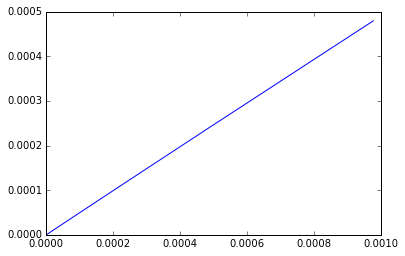

In [37]:
from matplotlib import pyplot

pyplot.plot(widths, errors)

You should immediately see a plot appear. The `pyplot` library gives a (slightly!) simpler interface to `matplotlib`, so the `import` is giving us access to direct plotting functions. The `plot` function just plots `widths` on the $x$ axis and `errors` on the $y$. By default, it uses a blue line.

Let's plot using markers instead of a line

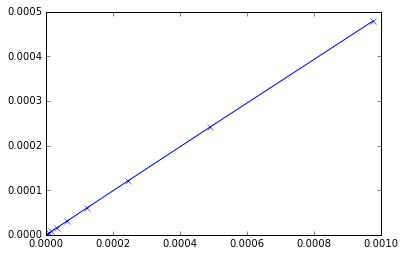

In [38]:
pyplot.plot(widths, errors, marker='x')

You can see the points clustering near the origin. The problem is the choice or linear axes, when we chose the number of strips (and hence their width) to change geometrically. We could try making the axis corresponding to the `widths`, the $x$ axis, be logarithmic:

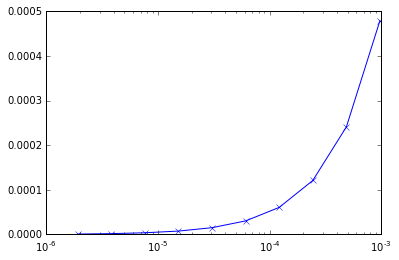

In [39]:
pyplot.semilogx(widths, errors, marker='x')

However, whilst this shows the points as being nicely spaced, it's not such a nice trend as before. Let us try having both axes being logarithmic:

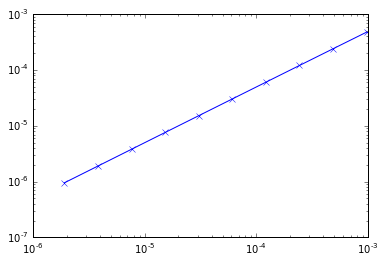

In [40]:
pyplot.loglog(widths, errors, marker='x')

Now we see a clear trend - this looks like a straight line on a log-log scale. The implications of this will be discussed later.

To produce a nicer plot we should label the axes and the data, and add a legend. Try the following:

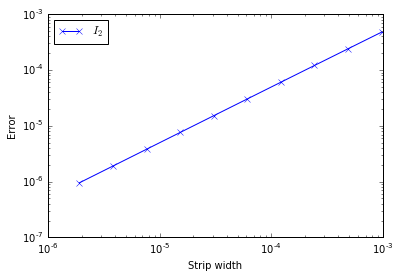

In [41]:
pyplot.loglog(widths, errors, marker='x', label = r"$I_2$")
pyplot.ylabel("Error")
pyplot.xlabel("Strip width")
pyplot.legend(loc="upper left")

Finally, we can put this analysis into a script, called `lab1_convergence.py`:

```python
import numpy
from matplotlib import pyplot
from lab1_integral_7 import integral

def f_2(x):
    return numpy.sqrt(1.0-x**2)
    
I_2_exact = numpy.pi/4

Nstrips_all = 2**numpy.arange(10, 20)
widths = 1.0 / Nstrips_all
errors = numpy.zeros_like(widths)
for i, Nstrips in enumerate(Nstrips_all):
    I_2_approx = integral(f_2, Nstrips)
    errors[i] = abs(I_2_exact - I_2_approx)

pyplot.loglog(widths, errors, marker='x', label = r"$I_2$")
pyplot.ylabel("Error")
pyplot.xlabel("Strip width")
pyplot.legend(loc="upper left")
pyplot.show()
```

The final `pyplot.show()` may not always be needed, but it is usually safest to end with it to force the script to show any plots.

## `scipy` and black box solutions

Integration is such a common numerical task that you would expect it to have been solved many times before. For Python, tools for numerical integration are included in the third essential library (after `numpy` and `matplotlib`), which is `scipy`.

Numerical integration is often called *quadrature* which explains why the standard `scipy` function is called `quad`. To use it in its simplest form, try the following at the console:

In [42]:
import numpy
from scipy import integrate

def f_2(x):
    return numpy.sqrt(1.0-x**2)

integral = integrate.quad(f_2, 0.0, 1.0)
print(integral)

(0.7853981633974481, 8.833911380179416e-11)


We see that using the `quad` function is much like using our previous functions: we pass the function to be integrated, and the limits of integration. What is interesting is the result that it passes back, which is not one number but two. What is it trying to tell us?

Let us look at the help, by typing `help(integrate.quad)`. The result is some very detailed documentation that tells us far more than we want to know. The crucial section starts `Returns`, which tells us what the outputs from the function are. The first is the integral approximation itself. The second is an approximation of the error made. As we see from above, the error is small.

The outputs are returned as a list, so we can access them like a `numpy` array:

In [43]:
print("The integral is", integral[0],
      "plus or minus", integral[1])

The integral is 0.7853981633974481 plus or minus 8.833911380179416e-11


# Exercises

1. Check how the error behaves with the width of the strips for a different integrand.
2. Modify the `lab1_convergence.py` script so that there is a function that can produce the convergence plot given a function and its name as input (the name is needed for the legend). You will need to use `scipy` to construct the "exact" solution.
3. Investigate `matplotlib` line and marker styles, sizes and colours to see how to present the results.

# Linear Algebra

In [44]:
%matplotlib inline

A really simple boundary value problem is the following. A person standing still throws a ball straight up at time $t=0$. If they catch the ball at time $t=1$ second, what is the height of the ball as a function of time?

The mathematical way of phrasing this is that the height (above the point of release) is $h(t)$, which solves the boundary value problem

$$
  \frac{\text{d}^2 h}{\text{d} t^2} = -g, \quad h(0) = 0, \quad h(1) = 0.
$$

We will see later in the course that we can solve this problem, and many other more complex boundary value problems, by converting it to a matrix problem. We introduce a vector ${\bf t}$ of times at which we will measure the height. The first component, $t_0$, will be at the start: $t_0 = 0$. The last component, $t_{N+1}$, will be at the end: $t_{N+1} = 1$. The times will be evenly spaced, so $t_{i+1} = t_i + \Delta t$. We will also use a vector ${\bf H}$ of heights. The vector will be the same size as the vector of times, and we know the values at the start, $H_0 = 0$, and at the end, $H_{N+1} = 0$. The other values of the height are initially unknown, but we will show that they satisfy the matrix equation

$$
  A {\bf h} = {\bf g},
$$

where the matrix $A$ is zero nearly everywhere, the vector ${\bf h}$ contains the *interior* entries of ${\bf H}$, ie $(H_1, \dots, H_N)$, and all the components of the vector ${\bf g}$ are $-g \left( \Delta t \right)^2$.

The only non-zero entries of the matrix $A$ are on the diagonal - all those entries are $-2$ - or immediately above or below the diagonal - those entries are $1$. That is,

$$
  A = 
  \begin{pmatrix}
  -2 & 1 & 0 & 0 & 0 & \dots & 0 \\
  1 & -2 & 1 & 0 & 0 & \dots & 0 \\
  0 & 1 & -2 & 1 & 0 & \dots & 0 \\
  \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
  0 & 0 & \dots & 0 & 1 & -2 & 1 \\
  0 & 0 & \dots & 0 & 0 & 1 & -2
  \end{pmatrix}.
$$

## Using `numpy`

We introduced `numpy` earlier, but only touched a couple of features. Now we want to build and manipulate vectors and matrices.

First we define the size of our problem. We'll keep it small for now.

In [45]:
import numpy

N = 4

Next we'll define a vector. This is going to be the diagonal of the matrix. We can do this many ways, but the "standard" way is:

In [46]:
diagonal = -2 * numpy.ones(N)
print(diagonal)

[-2. -2. -2. -2.]


The `numpy` function `ones` produces a vector of given length (here $N$ which is $4$), all of whose components are $1$. We then multiply by the value we want the vector to be.

We can use the same function to create the vector of off-diagonal terms: as it's "above" or "below" the diagonal, it only contains $N-1$ entries:

In [47]:
off_diagonal = numpy.ones(N-1)
print(off_diagonal)

[ 1.  1.  1.]


We can now construct *diagonal* matrices from these vectors very easily using the `numpy` command `diag`:

In [48]:
A_1 = numpy.diag(diagonal)
A_2 = numpy.diag(off_diagonal, 1)
A_3 = numpy.diag(off_diagonal, -1)
print(A_1)
print(A_2)
print(A_3)

[[-2.  0.  0.  0.]
 [ 0. -2.  0.  0.]
 [ 0.  0. -2.  0.]
 [ 0.  0.  0. -2.]]
[[ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  0.]]
[[ 0.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]]


We can then add together all these matrices to get the object we require:

In [49]:
A = A_1 + A_2 + A_3
print(A)

[[-2.  1.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 0.  1. -2.  1.]
 [ 0.  0.  1. -2.]]


Note that the function `diag` will produce a vector from a matrix *or* (as we did above) a matrix from a vector:

In [50]:
print(numpy.diag(A))

[-2. -2. -2. -2.]


We can use exactly the same approach to construct the vector ${\bf g}$. We just need the value of $\Delta t$, which is $1 / (N+1)$, and the value of $g$. Here we can use `scipy`, which holds the value of a lot of scientific constants:

In [51]:
from scipy import constants

dt = 1 / (N+1)
g = -constants.g * dt**2 * numpy.ones(N)

So we now have the matrix $A$ and the known right-hand-side vector ${\bf g}$. We need to solve the linear system to find ${\bf h}$. Both `numpy` and `scipy` can do this:

In [52]:
from numpy import linalg as np_la
print(np_la.solve(A, g))
from scipy import linalg as sp_la
print(sp_la.solve(A, g))

h = sp_la.solve(A, g)

[ 0.784532  1.176798  1.176798  0.784532]
[ 0.784532  1.176798  1.176798  0.784532]


Note that we have used a variant of the `import` command to give the libraries different names.

Now that we can construct the result, we want to build the full vector ${\bf H}$, and the vector of times ${\bf t}$, so we can plot the result. Both these vectors have $N+2$ entries, as they include the boundary points. Again, this can be done many ways.

First, build the time vector using `linspace`:

In [53]:
t = numpy.linspace(0, 1, N+2)

Now to build ${\bf H}$. We start by creating a vector of zeros, which is of course correct for the boundaries:

In [54]:
H = numpy.zeros(N+2)
print(H)

[ 0.  0.  0.  0.  0.  0.]


Then we fill the interior entries. We could do this using a loop:

In [55]:
for i in range(N):
    H[i+1] = h[i]
print(H)

[ 0.        0.784532  1.176798  1.176798  0.784532  0.      ]


But it's quicker and clearer to use `numpy`'s *slicing* or *colon* notation. To do this, first look at array access. We've seen things like:

In [56]:
print(H[0])
print(H[2])

0.0
1.176798


We can also access a *range* of values:

In [57]:
print(H[0:2])

[ 0.        0.784532]


Note that, just with loops using the `range` function, the final value is not included. 

If we want to start from the beginning we can ignore the number before the colon:

In [58]:
print(H[:2])

[ 0.        0.784532]


And we can do the same for the end:

In [59]:
print(H[2:])

[ 1.176798  1.176798  0.784532  0.      ]


We can also *count back from the end*, using negative numbers:

In [60]:
print(H[-1])
print(H[-2])
print(H[1:-1])

0.0
0.784532
[ 0.784532  1.176798  1.176798  0.784532]


It's this last form that's particularly useful. It tells us that `H[1:-1]` is "all entries of ${\bf H}$, except the first and last".

So, to set the interior values of ${\bf H}$, we can use `numpy` slicing to do

In [61]:
H[1:-1] = h
print(H)

[ 0.        0.784532  1.176798  1.176798  0.784532  0.      ]


Before we go on, note that `numpy` indexing and slicing applies to higher-dimensional objects like matrices as well. For example,

In [62]:
print(A[0, 0])
print(A[0, :])
print(A[1:3, 1:3])

-2.0
[-2.  1.  0.  0.]
[[-2.  1.]
 [ 1. -2.]]


So we now have our result, in the vectors ${\bf t}, {\bf H}$. Let's plot it to check:

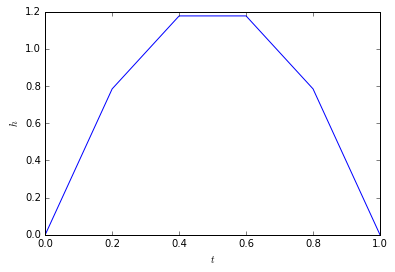

In [63]:
from matplotlib import pyplot

pyplot.plot(t, H)
pyplot.xlabel(r"$t$")
pyplot.ylabel(r"$h$")
pyplot.show()

We can see that the result is very blocky, as we used very few points. Let us create a function to solve the problem:

In [64]:
import numpy
from scipy import linalg, constants

def height(N):
    """
    Solve the boundary value problem for the height.
    """
    
    # Build the matrix
    diagonal = -2 * numpy.ones(N)
    off_diagonal = numpy.ones(N-1)
    A_1 = numpy.diag(diagonal)
    A_2 = numpy.diag(off_diagonal, 1)
    A_3 = numpy.diag(off_diagonal, -1)
    A = A_1 + A_2 + A_3
    # Build the RHS vector
    dt = 1 / (N+1)
    g = -constants.g * dt**2 * numpy.ones(N)
    # Solve the problem
    h = linalg.solve(A, g)
    # Create the output
    t = numpy.linspace(0, 1, N+2)
    H = numpy.zeros(N+2)
    H[1:-1] = h
    
    return t, H

And then we'll plot the results when using many more points:

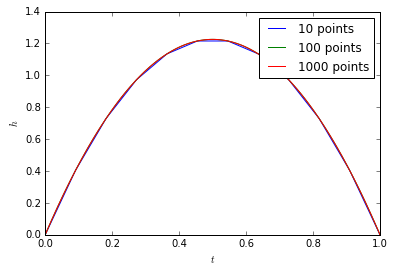

In [65]:
t10, H10 = height(10)
t100, H100 = height(100)
t1000, H1000 = height(1000)


pyplot.plot(t10, H10, label="10 points")
pyplot.plot(t100, H100, label="100 points")
pyplot.plot(t1000, H1000, label="1000 points")
pyplot.xlabel(r"$t$")
pyplot.ylabel(r"$h$")
pyplot.legend()
pyplot.show()

## More matrix operations

In general we'll need to do a lot of linear algebra and matrix operations using `numpy`. We've seen how to create linearly spaced vectors:

In [66]:
x = numpy.linspace(0, 1, 20)
print(x)

[ 0.          0.05263158  0.10526316  0.15789474  0.21052632  0.26315789
  0.31578947  0.36842105  0.42105263  0.47368421  0.52631579  0.57894737
  0.63157895  0.68421053  0.73684211  0.78947368  0.84210526  0.89473684
  0.94736842  1.        ]


We also need to be able to define *specific* vectors and arrays. For example,

In [67]:
a = numpy.array([1.0, 2.3, 4.56])
b = numpy.array([-0.1, 17.4, 8.1])
A = numpy.array([ [1.0, 3.14, 5.667], 
                  [8.0, -1.1, 15.22],
                  [0.2, -0.1, 234.1] ])
print(a)
print(b)
print(A)

[ 1.    2.3   4.56]
[ -0.1  17.4   8.1]
[[  1.00000000e+00   3.14000000e+00   5.66700000e+00]
 [  8.00000000e+00  -1.10000000e+00   1.52200000e+01]
 [  2.00000000e-01  -1.00000000e-01   2.34100000e+02]]


It's also useful to know the size and shape of arrays:

In [68]:
print(len(a))
print(a.shape)
print(a.size)
print(len(A))
print(A.shape)
print(A.size)

3
(3,)
3
3
(3, 3)
9


We can use the size of the array, together with logical operations, to set the matrix $A$ component-by-component. We can loop over each row and column, and check if we are on (or next to) the diagonal using logical operations:

In [69]:
for row in range(A.shape[0]):
    for column in range(A.shape[1]):
        if row == column:
            A[row, column] = -2
        elif row == column - 1:
            A[row, column] = 1
        elif row == column + 1:
            A[row, column] = 1
        else:
            A[row, column] = 0
print(A)

[[-2.  1.  0.]
 [ 1. -2.  1.]
 [ 0.  1. -2.]]


We could make this more compact using the `or` statement:

In [84]:
for row in range(A.shape[0]):
    for column in range(A.shape[1]):
        if row == column:
            A[row, column] = -2
        elif (row == column - 1) or (row == column + 1):
            A[row, column] = 1
        else:
            A[row, column] = 0
print(A)

[[-2  1  0]
 [ 1 -2  1]
 [ 0  1 -2]]


Other logical statements include `and` and `not`.

We can slice the vector, as we've seen, but also with a *stride*. For example, we can get all the *odd* elements (in the sense of first, third, fifth, etc) using

In [70]:
print(x[0::2])

[ 0.          0.10526316  0.21052632  0.31578947  0.42105263  0.52631579
  0.63157895  0.73684211  0.84210526  0.94736842]


We can apply functions to vectors to produce other vectors:

In [71]:
y = numpy.exp(1.0 + x**2) * numpy.sin(3.0 * x)
print(y)

[ 0.          0.42860686  0.85361477  1.27129552  1.67765998  2.06832157
  2.43835262  2.78213131  3.09317726  3.36397393  3.58577665  3.74840583
  3.84002569  3.84691077  3.75320442  3.54067654  3.1884924   2.67300987
  1.9676309   1.04274366]


We can *reduce* vectors, by taking the sum, or the average, or the dot product:

In [72]:
print(numpy.sum(x))
print(numpy.mean(y))
print(numpy.dot(x, y))

10.0
2.45820052768
28.5605320959


Also there are mathematical vector operations like cross products:

In [73]:
print(numpy.cross(a, b))

[-60.714  -8.556  17.63 ]


We also have a lot of operations we can do with matrices. We can multiply matrices and vectors:

In [74]:
print(numpy.dot(A, b))

[ 17.6 -26.8   1.2]


Note that we use the `dot` function. In very recent versions of Python there is the `@` operator which works as matrix multiplication, but may not be available on many Python installations as yet.

We can transpose the matrix, or apply a function to each of its entries individually:

In [75]:
B = numpy.array([ [1, 2], [3, 4] ])
print(numpy.transpose(B))
print(B**2)

[[1 3]
 [2 4]]
[[ 1  4]
 [ 9 16]]


We can find the determinant and the condition number of the matrix:

In [76]:
print(numpy.linalg.det(B))
print(numpy.linalg.cond(B))

-2.0
14.9330343737


There is a single function that returns *both* the eigenvalues and eigenvectors of the matrix:

In [77]:
print(numpy.linalg.eig(B))

(array([-0.37228132,  5.37228132]), array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]]))


The eigenvalues are given as a vector, and the eigenvectors as a matrix. To store, output, and manipulate them, use slicing, such as:

In [78]:
eigenvalues, eigenvectors = numpy.linalg.eig(B)
print("First eigenvalue", eigenvalues[0], 
      "with vector", eigenvectors[:, 0])
print("Second eigenvalue", eigenvalues[1], 
      "with vector", eigenvectors[:, 1])
print("To check, compare:")
print("B * v[0]:", numpy.dot(B, eigenvectors[:, 0])) 
print("lambda[0] * v[0]:", eigenvalues[0] * eigenvectors[:, 0])

First eigenvalue -0.372281323269 with vector [-0.82456484  0.56576746]
Second eigenvalue 5.37228132327 with vector [-0.41597356 -0.90937671]
To check, compare:
B * v[0]: [ 0.30697009 -0.21062466]
lambda[0] * v[0]: [ 0.30697009 -0.21062466]


Note that `numpy` operations apply to each *component* of the matrix, which may not be what you want. For example, given 

$$
  C = \begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix}
$$

we may want to compute the matrix $C^2$ or the matrix exponential $e^C = I + C + C^2/2 + \dots$.

In [85]:
C = numpy.array([[1, 2], [3, 4]])

Compare the results of the *componentwise* operations and the *matrix* operations:

In [86]:
C_squared_component = C**2
C_squared_matrix = numpy.linalg.matrix_power(C, 2)
print(C_squared_component)
print(C_squared_matrix)

[[ 1  4]
 [ 9 16]]
[[ 7 10]
 [15 22]]


In [87]:
C_exp_component = numpy.exp(C)
C_exp_matrix = numpy.expm1(C)
print(C_exp_component)
print(C_exp_matrix)

[[  2.71828183   7.3890561 ]
 [ 20.08553692  54.59815003]]
[[  1.71828183   6.3890561 ]
 [ 19.08553692  53.59815003]]


Finally, we can manipulate arrays by reshaping them, or glueing them together:

In [79]:
print(numpy.hstack((a, b)))
print(numpy.vstack((a, b)))
print(numpy.reshape(B, (4,)))

[  1.     2.3    4.56  -0.1   17.4    8.1 ]
[[  1.     2.3    4.56]
 [ -0.1   17.4    8.1 ]]
[1 2 3 4]


# Exercises

1. Create a linearly spaced array `theta` to represent the angular location of points on a circle.
2. Create the $x, y$ locations of those points, assuming the circle has radius $1$.
3. Plot the circle.
4. Glue together the $x$ and $y$ arrays to make a $2 \times N$ sized array ${\bf r}$.
5. Create a random $2 \times 2$ matrix $A$.
6. Multiply every location $(x, y)$ on the circle by the matrix $A$ (ie, multiply ${\bf r}$ by $A$).
7. Plot the resulting locations, which should look like an ellipse.
8. Compute and plot the result when using $A^2, A^3, A^5$.
9. Compute the eigenvalues and eigenvectors of $A$. Can you link their values to how the circle behaves when repeatedly multiplied by a matrix?

# Black box methods and `scipy`

We will spend a lot of this course explaining how numerical methods work. But methods for more complex problems (solving differential equations, say) often rely on methods for simpler problems (solving linear systems, for example). It's essential to have robust, efficient methods available for solving these key tasks, as well as understanding how they work.

`scipy` will provide a lot of these underlying methods. Briefly, here are some essential black box methods.

## Solving linear systems

Given a (known) matrix $A$ and a (known) vector ${\bf b}$, solve $A {\bf x} = {\bf b}$ for the (unknown) ${\bf x}$:

In [80]:
import numpy
from scipy import linalg

A = numpy.array([ [1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 0]])
b = numpy.array([1, 2, 3])
x = linalg.solve(A, b)
print(x)

[ -3.33333333e-01   6.66666667e-01  -3.52451754e-18]


## Integration

Given a function $f(x)$, solve $I = \int_a^b \text{d}x \, f(x)$:

In [81]:
from scipy import integrate

def f(x):
    return numpy.sin(x)**2 + numpy.cos(2.0 * numpy.pi * x)

I = integrate.quad(f, 0, 1)
print(I[0])

0.2726756432935796


## Root finding

Given a function $f(x)$, find the value $s$ such that $f(s) = 0$.

As we will see in lectures, these algorithms need either an initial guess for $s$, or an interval within which it lies.

In [82]:
from scipy import optimize

def f(x):
    return numpy.cos(x) - x

s = optimize.brentq(f, 0, 1)
print(s)
print(f(s))

0.7390851332151559
7.88258347484e-15


## Differential equations

As we'll see in lectures, you can always write a system of differential equations in first order form as

$$
  \frac{\text{d}}{\text{d} t} {\bf y} = {\bf f} \left( {\bf y}, t \right).
$$

If you know the initial data, ie ${\bf y}(0) = {\bf y}_0$ is known, then this *Initial Value Problem* can be solved by `scipy`. For the simple problem

$$
  \frac{\text{d} y}{\text{d} t} = -y, \quad y(0) = 1, \quad t \in [0, 10]
$$

the solution is

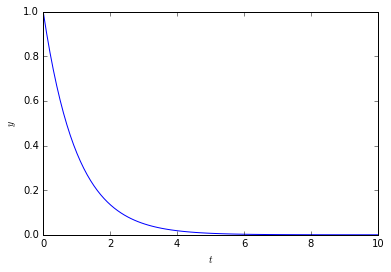

In [83]:
import numpy
from scipy import integrate

def dydt(y, t):
    return -y

t = numpy.linspace(0, 10, 100)
y = integrate.odeint(dydt, [1.0], t)

from matplotlib import pyplot
pyplot.plot(t, y)
pyplot.xlabel(r"$t$")
pyplot.ylabel(r"$y$")
pyplot.show()

# Exercises

1. Integrate $\exp(x^2 \cos^2 ( 2 \pi x ) )$ over $[0, 1]$.
2. Using the help, try modifying the accuracy of the `quad` solver and see if it makes much difference to the result or the speed.
3. Solve the differential equation
$$
  \dot{y} = -C(t) y(t), \quad y(0) = 1, \quad t \in [0, 10]
$$
where
$$
  C(t) = 1 + \int_0^t \text{d}s \, \sin^2(s).
$$
4. Solve the differential equation
$$
  \frac{\text{d}}{\text{d}t} \begin{pmatrix} x(t) \\ y(t) \end{pmatrix} = \begin{pmatrix} -y(t) \\ x(t) \end{pmatrix} \quad \begin{pmatrix} x(0) \\ y(0) \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad t \in [0, 500]. 
$$
Plot both $x$ against $y$ and $r$ against $t$ (on separate plots!) where $r^2 = x^2 + y^2$.

# Plotting

We will concentrate on using `matplotlib` to plot data in Python. There is a very detailed introduction on [this page by Johanssen](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb), but we'll focus on the crucial cases here.

## Line plots

Above we looked at line plots only: here's a quick summary.

In [2]:
import numpy
from matplotlib import pyplot

Creating a single plot with multiple lines:

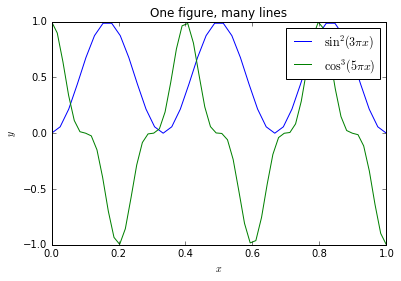

In [4]:
x = numpy.linspace(0, 1, 40)
y = numpy.sin(3*numpy.pi*x)**2
v = numpy.linspace(0, 1, 60)
w = numpy.cos(5*numpy.pi*v)**3
pyplot.plot(x, y, label=r"$\sin^2(3 \pi x)$")
pyplot.plot(v, w, label=r"$\cos^3(5 \pi x)$")
pyplot.xlabel(r"$x$")
pyplot.ylabel(r"$y$")
pyplot.legend()
pyplot.title("One figure, many lines")
pyplot.show()

The dollar symbols indicate the use of LaTeX to typeset the mathematics. The `r` before the quotes is to ensure the string is interpreted correctly - the backslashes would cause problems otherwise.

Using subplots:

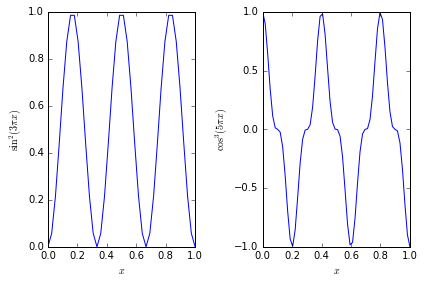

In [6]:
pyplot.subplot(1,2,1)
pyplot.plot(x, y)
pyplot.xlabel(r"$x$")
pyplot.ylabel(r"$\sin^2(3 \pi x)$")
pyplot.subplot(1,2,2)
pyplot.plot(v, w)
pyplot.xlabel(r"$x$")
pyplot.ylabel(r"$\cos^3(5 \pi x)$")
pyplot.tight_layout()
pyplot.show()

The arguments to `subplot` are the number of rows and columns and the number of the plot (left to right, top to bottom).

Fixing the way the lines or markers appear:

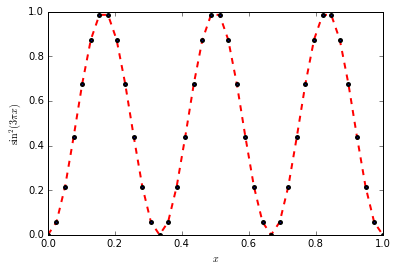

In [8]:
pyplot.plot(x, y, marker='o', 
            markerfacecolor='b', markeredgecolor='k', 
            markersize=2, markeredgewidth=3,
            linewidth=2, linestyle='--', color='r')
pyplot.xlabel(r"$x$")
pyplot.ylabel(r"$\sin^2(3 \pi x)$")
pyplot.show()

Fixing the range and the labels:

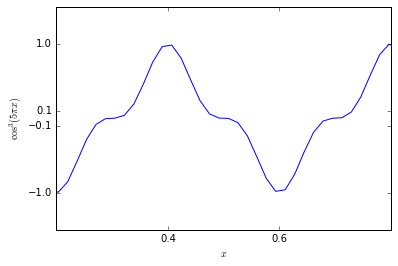

In [11]:
pyplot.plot(v, w)
pyplot.xlabel(r"$x$")
pyplot.ylabel(r"$\cos^3(5 \pi x)$")
pyplot.xlim(0.2, 0.8)
pyplot.ylim(-1.5, 1.5)
pyplot.xticks([0.4, 0.6])
pyplot.yticks([-1, -0.1, 0.1, 1])
pyplot.show()

There are a range of [style sheets](http://matplotlib.org/examples/style_sheets/index.html) for plots, which can be used to rapidly customize plots. Compare the bare plot

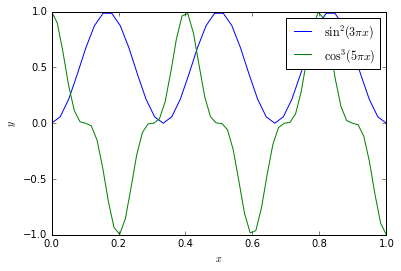

In [18]:
pyplot.plot(x, y, label=r"$\sin^2(3 \pi x)$")
pyplot.plot(v, w, label=r"$\cos^3(5 \pi x)$")
pyplot.legend()
pyplot.xlabel(r"$x$")
pyplot.ylabel(r"$y$")
pyplot.show()

with the stylesheet plot

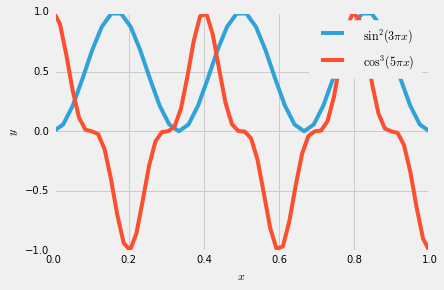

In [19]:
with pyplot.style.context(('fivethirtyeight')):
    pyplot.plot(x, y, label=r"$\sin^2(3 \pi x)$")
    pyplot.plot(v, w, label=r"$\cos^3(5 \pi x)$")
    pyplot.legend()
pyplot.xlabel(r"$x$")
pyplot.ylabel(r"$y$")
pyplot.show()

## Components of a plot

The top level functions above work for the simple cases. Sometimes we need to access and manipulate all the components of the plot: the figure, the axes, etc.

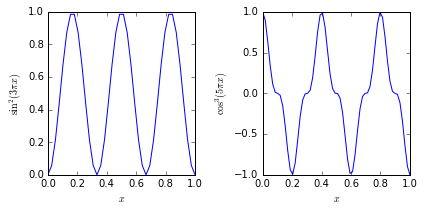

In [20]:
fig = pyplot.figure(figsize=(6,3))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(x, y)
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$\sin^2(3 \pi x)$")
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(v, w)
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$\cos^3(5 \pi x)$")
fig.tight_layout()
pyplot.show()

## 3d plots

These require a different type of *axis*, so we need to `import` the appropriate axis first:

In [15]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

Now we can set up a 3d axis on which we can plot:

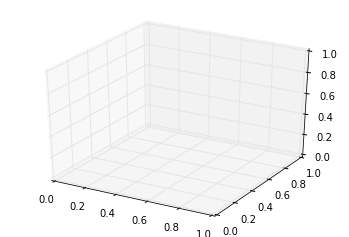

In [21]:
fig = pyplot.figure()
ax3d = fig.add_subplot(1, 1, 1, projection='3d')
pyplot.show()

Line plots in 3d are a simple extension: just add a third dimension:

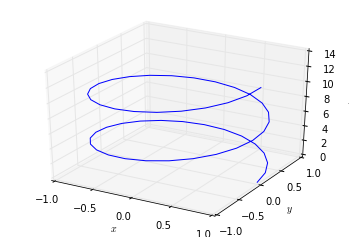

In [22]:
theta = numpy.linspace(0, 4*numpy.pi)
x = numpy.cos(theta)
y = numpy.sin(theta)
z = theta

fig = pyplot.figure()
ax3d = fig.add_subplot(1, 1, 1, projection='3d')
ax3d.plot3D(x, y, z)
ax3d.set_xlabel(r"$x$")
ax3d.set_ylabel(r"$y$")
ax3d.set_zlabel(r"$z$")
pyplot.show()

We can set the viewing angle (azimuth and elevation, in degrees):

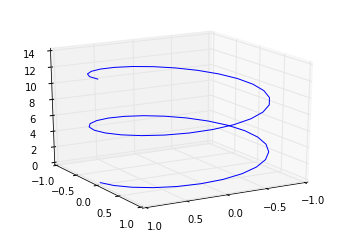

In [24]:
fig = pyplot.figure()
ax3d = fig.add_subplot(1, 1, 1, projection='3d')
ax3d.plot3D(x, y, z)
ax3d.view_init(20, 60)
pyplot.show()

Plotting surfaces is a little more complex. Again we pass the $x, y, z$ variables, but now they must be two-dimensional objects to get the most out of the connections between points. If we have a grid for the $x$ and $y$ coordinates then we can create arrays from them, and then use those arrays to create functions of the coordinates:

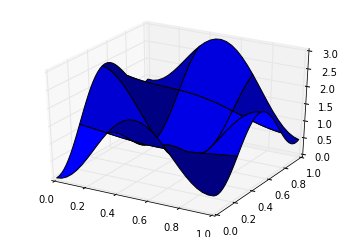

In [31]:
x = numpy.linspace(0, 1, 30)
y = numpy.linspace(0, 1, 40)
X, Y = numpy.meshgrid(x, y)
Z = 2-numpy.cos(2*numpy.pi*X)*numpy.cos(2*numpy.pi*Y)-numpy.cos(X-2*Y)
fig = pyplot.figure()
ax3d = fig.add_subplot(1, 1, 1, projection='3d')
ax3d.plot_surface(X, Y, Z)
pyplot.show()

The surface lines are associated with *strides*, and by default aren't very helpful. Change this by fixing the row (`r`) and column (`c`) strides:

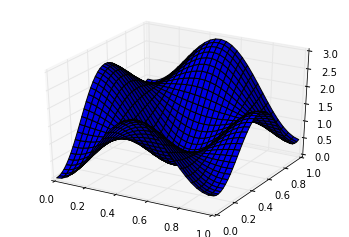

In [32]:
fig = pyplot.figure()
ax3d = fig.add_subplot(1, 1, 1, projection='3d')
ax3d.plot_surface(X, Y, Z, rstride=1, cstride=1)
pyplot.show()

The default colormap isn't very useful either. Let's make the lines zero width and change the colormap to the `viridis` map, and add a scale:

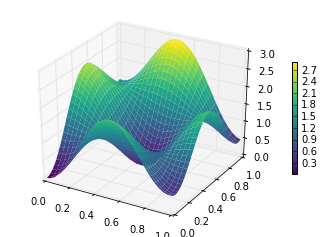

In [37]:
from matplotlib import cm

fig = pyplot.figure()
ax3d = fig.add_subplot(1, 1, 1, projection='3d')
p = ax3d.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      linewidth=0, cmap = cm.viridis)
fig.colorbar(p, shrink=0.5)
pyplot.show()

# Exercises

1. Investigate the 3d plots using `plot_wireframe` and `contour`.
2. Investigate saving the output using `savefig`. Check which formats work best on your machine(s).
3. Check through the logarithmic plotting commands. How do you make a 3d plot with a logarithmic $z$ axis?